In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [138]:
data_new=pd.read_csv('restaurants.csv')
data_new=data_new.drop(['Unnamed: 0', 'price_range', 'name','reviews_rating_1','reviews_rating_2','reviews_rating_3','reviews_rating_4','reviews_rating_5'],axis=1)
data_new

,rating,price_range_numeric,is_sponsored,latitude,longitude,has_delivery,is_premium,reviews,IsIn_MICHELIN_Guide,is close to sightseeng,...,Dog Friendly,Options for PWD,Has Diff Payment Options,Family,Good Location,Gift Cards,Alcohol,Reservations,Has Diff Dining Services,Entertainment
0,4.5,2.5,1,51.510597,-0.137677,0,0,602,0.0,1,...,0,0,1,1,0,0,1,1,1,1
1,4.0,2.5,1,51.520620,-0.122808,0,1,182,0.0,1,...,0,1,1,0,0,0,1,0,1,0
2,4.5,2.5,0,51.512955,-0.075292,0,1,316,0.0,1,...,0,0,1,0,0,0,1,1,1,0
3,4.5,2.5,0,51.488724,-0.120889,0,0,733,0.0,0,...,0,1,1,0,0,0,1,1,1,0
4,5.0,2.5,0,51.522408,-0.124933,0,0,48,0.0,1,...,1,1,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,4.6,3.0,0,51.512120,-0.134599,1,1,44,0.0,1,...,0,0,0,1,0,0,1,0,1,0
8942,4.7,4.0,0,51.601208,-0.243339,0,0,8192,0.0,1,...,0,1,0,1,0,0,1,0,1,1
8943,4.0,4.0,0,51.511200,-0.147390,0,0,17,0.0,1,...,0,0,0,0,0,0,1,0,0,0
8944,4.6,2.0,0,51.514233,-0.122250,0,0,15,0.0,1,...,0,0,0,1,0,0,1,0,1,0


In [139]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8946 entries, 0 to 8945
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rating                             8946 non-null   float64
 1   price_range_numeric                8946 non-null   float64
 2   is_sponsored                       8946 non-null   int64  
 3   latitude                           8946 non-null   float64
 4   longitude                          8946 non-null   float64
 5   has_delivery                       8946 non-null   int64  
 6   is_premium                         8946 non-null   int64  
 7   reviews                            8946 non-null   int64  
 8   IsIn_MICHELIN_Guide                8946 non-null   float64
 9   is close to sightseeng             8946 non-null   int64  
 10  num_cuisines                       8946 non-null   int64  
 11  Italian                            8946 non-null   int64

In [140]:
X = data_new.drop('rating', axis=1)
Y = data_new['rating']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
clf = RandomForestRegressor(n_estimators=115, max_features=15)

In [143]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_features=15, n_estimators=115)

In [144]:
from sklearn.metrics import mean_squared_error

In [145]:
mean_squared_error(y_test, clf.predict(X_test))

0.1665211422416069

In [146]:
import matplotlib.pyplot as plt

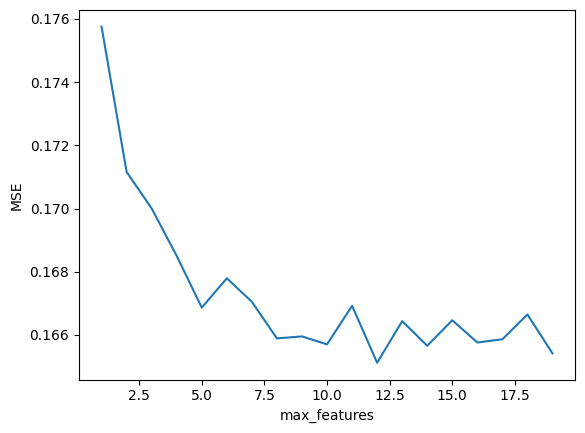

In [147]:
Q = []
for max_feat in range(1, 20):
  clf = RandomForestRegressor(n_estimators=100, max_features=max_feat)
  clf.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf.predict(X_test)))

plt.plot(range(1, 20), Q)
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.show()

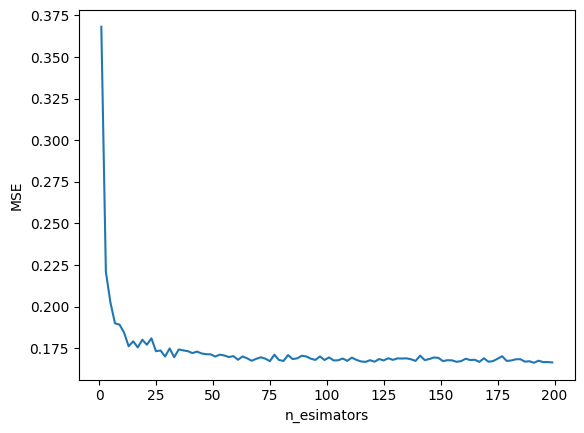

In [101]:
Q = []
for n_est in range(1, 200, 2):
  clf = RandomForestRegressor(n_estimators=n_est, max_features=10)
  clf.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf.predict(X_test)))

plt.plot(range(1, 200, 2), Q)
plt.xlabel('n_esimators')
plt.ylabel('MSE')
plt.show()

In [105]:
predictions_np=clf.predict(X_test)
predictions_np

array([4.4173913 , 4.42608696, 3.89304348, ..., 3.84782609, 4.06086957,
       4.26086957])

In [106]:
data_new['rating'].unique()

array([4.5, 4. , 5. , 3.5, 3. , 2.5, 2. , 1.5, 0. , 4.1, 1. , 4.6, 3.7,
       4.4, 3.9, 3.2, 4.7, 4.2, 4.3, 3.8, 4.8])

In [107]:
df = pd.DataFrame(predictions_np, columns=['prediction'])
df['ans']=y_test.values
df

,prediction,ans
0,4.417391,4.5
1,4.426087,5.0
2,3.893043,4.5
3,3.843478,3.5
4,4.093913,4.0
...,...,...
1785,3.882609,4.5
1786,4.095652,4.5
1787,3.847826,4.0
1788,4.060870,3.5


In [108]:
df['prediction round'] = np.round(df['prediction']).astype(int)
df['ans round'] = np.round(df['ans']).astype(int)

In [109]:
df

,prediction,ans,prediction round,ans round
0,4.417391,4.5,4,4
1,4.426087,5.0,4,5
2,3.893043,4.5,4,4
3,3.843478,3.5,4,4
4,4.093913,4.0,4,4
...,...,...,...,...
1785,3.882609,4.5,4,4
1786,4.095652,4.5,4,4
1787,3.847826,4.0,4,4
1788,4.060870,3.5,4,4


In [110]:
df[df['prediction round']==df['ans round']].shape[0]/df.shape[0]

0.8782122905027933

In [ ]:
#посмотрим на важность признаков

100%|===================| 1788/1790 [04:16<00:00]       

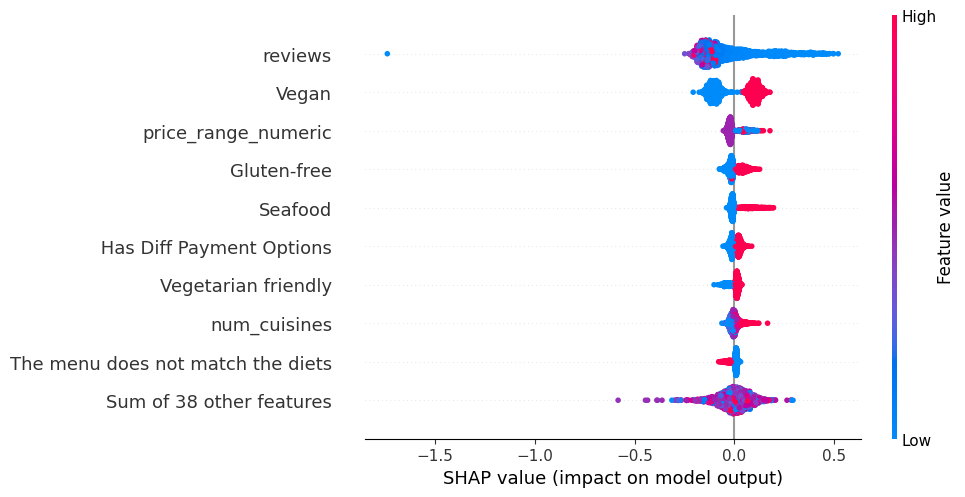

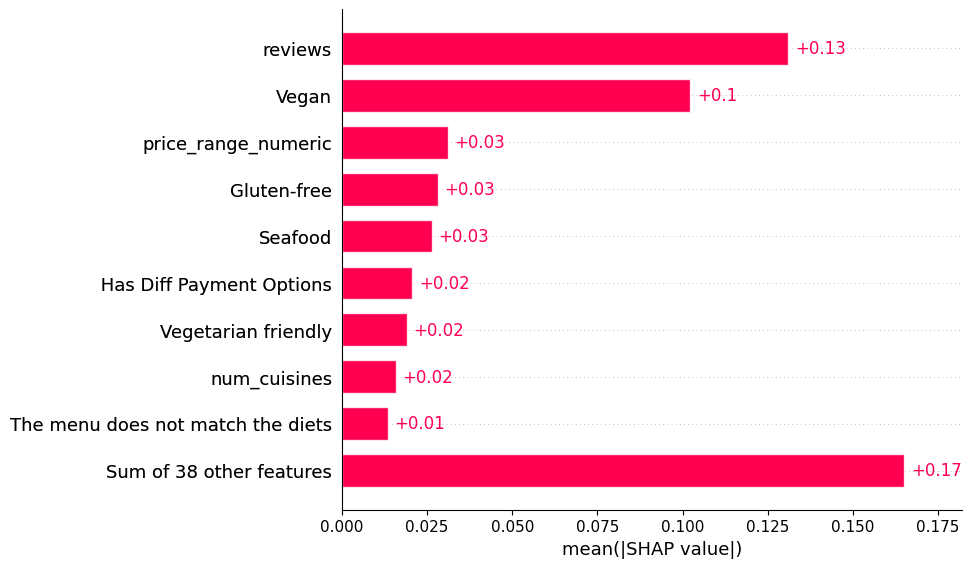

In [111]:
import shap
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_test)

# визуализация важности признаков
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

In [ ]:
#если красные точки в основном справа, то признак повышает рейтинг
#ось Х рисуется как для классификации, но ее нужно интерпретировать
#ось X — это вклад признака в итоговую численную оценку

In [ ]:
#особенно важным для ресторана оказалось наличие вегетерианского меню
#а так же количество отзывов, но на самом деле это скорее причина чем следствие

In [116]:
clf.feature_importances_

array([0.02893572, 0.00082361, 0.12554503, 0.1281532 , 0.01678651,
       0.00439457, 0.21123527, 0.00307375, 0.01617693, 0.04903141,
       0.01347884, 0.0086292 , 0.01205544, 0.01017694, 0.01720281,
       0.00660603, 0.00948729, 0.00779861, 0.00127441, 0.01364132,
       0.01428893, 0.00906385, 0.01400155, 0.00756029, 0.00685946,
       0.01173217, 0.01438283, 0.00630763, 0.00845582, 0.00447263,
       0.03621862, 0.0074817 , 0.01632806, 0.01366871, 0.01114302,
       0.01032907, 0.014619  , 0.00761452, 0.01689341, 0.01742965,
       0.01140996, 0.00111276, 0.00992833, 0.01309106, 0.01475039,
       0.00642721, 0.00992245])

In [117]:
data_new.columns

Index(['rating', 'price_range_numeric', 'is_sponsored', 'latitude',
       'longitude', 'has_delivery', 'is_premium', 'reviews',
       'IsIn_MICHELIN_Guide', 'is close to sightseeng', 'num_cuisines',
       'Italian', 'American', 'Chinese', 'Healthy', 'Seafood',
       'Middle Eastern', 'International', 'Indian', 'Central Asian', 'Bar',
       'European', 'Pizza', 'Asian', 'Latin', 'Japanese', 'Cafe', 'British',
       'French', 'Fast Food', 'African', 'Vegan', 'Halal/Kosher',
       'Gluten-free', 'Vegetarian friendly',
       'The menu does not match the diets', 'Parking', 'Free Wifi',
       'Dog Friendly', 'Options for PWD', ' Has Diff Payment Options',
       'Family', 'Good Location', 'Gift Cards', 'Alcohol', 'Reservations',
       'Has Diff Dining Services', 'Entertainment'],
      dtype='object')

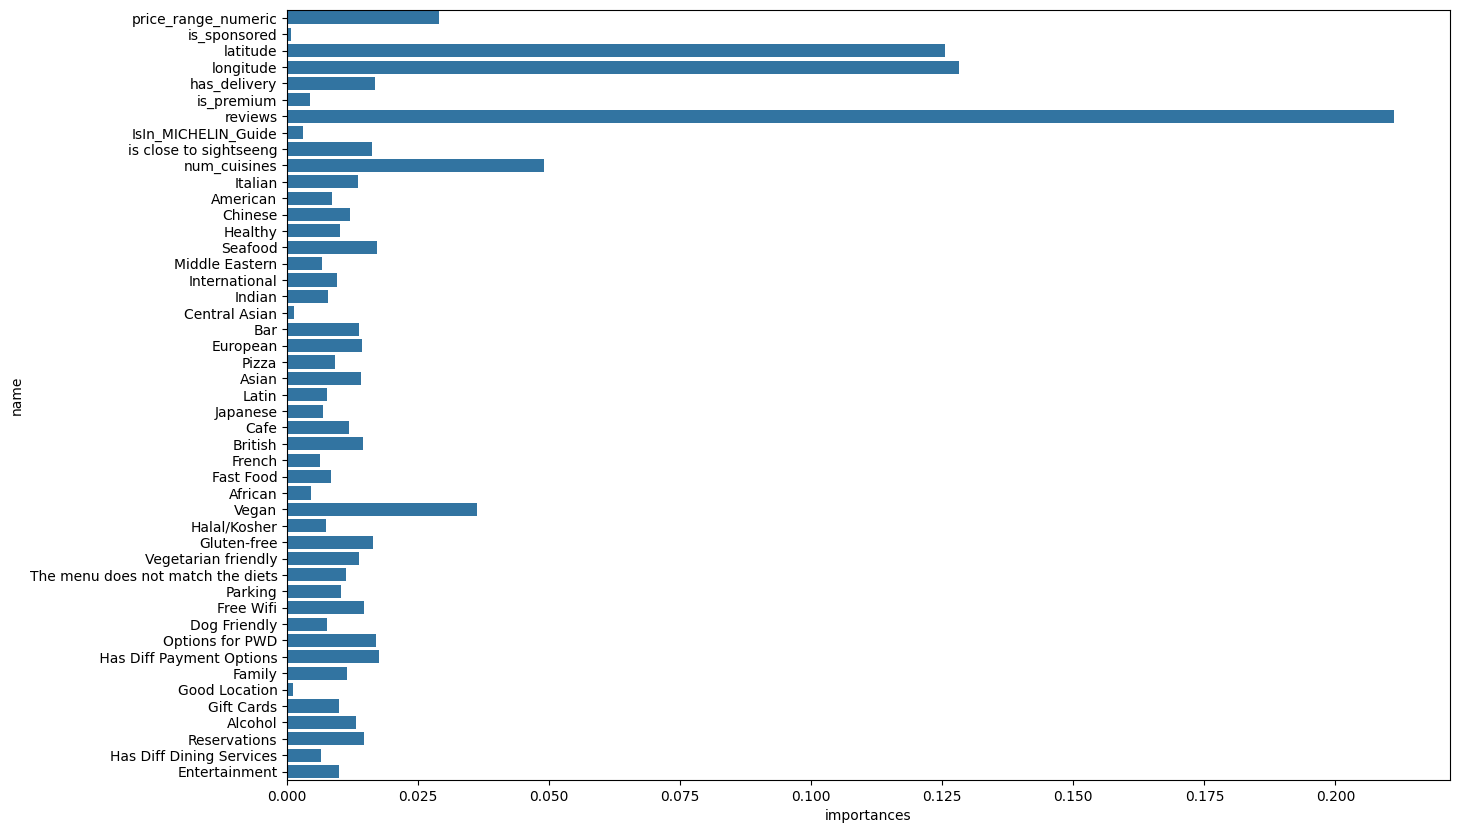

In [119]:
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(figsize=(15, 10))
feature_imp = pd.DataFrame({'importances': clf.feature_importances_, 'name':X_train.columns})
fig = sns.barplot(x="importances", y="name", data=feature_imp)

In [120]:
#тут получились тоже что "vegan" важно, но еще добавилось "num cuisines" и местоположение.
#но shap точнее, тем более что этот график не объясняет как именно признак влияет.
#+ противоречия по поводу признака "vegan" нет

#вывод: один из показателей успеха - наличие веганского меню

In [ ]:
#теперь сделаем классификацию чтобы оценить метрики и сравнить с другими моделями

In [150]:
data_new['rating bin']=data_new['rating'].apply(lambda x: 1 if x>=4 else 0)
data_new

,rating,price_range_numeric,is_sponsored,latitude,longitude,has_delivery,is_premium,reviews,IsIn_MICHELIN_Guide,is close to sightseeng,...,Options for PWD,Has Diff Payment Options,Family,Good Location,Gift Cards,Alcohol,Reservations,Has Diff Dining Services,Entertainment,rating bin
0,4.5,2.5,1,51.510597,-0.137677,0,0,602,0.0,1,...,0,1,1,0,0,1,1,1,1,1
1,4.0,2.5,1,51.520620,-0.122808,0,1,182,0.0,1,...,1,1,0,0,0,1,0,1,0,1
2,4.5,2.5,0,51.512955,-0.075292,0,1,316,0.0,1,...,0,1,0,0,0,1,1,1,0,1
3,4.5,2.5,0,51.488724,-0.120889,0,0,733,0.0,0,...,1,1,0,0,0,1,1,1,0,1
4,5.0,2.5,0,51.522408,-0.124933,0,0,48,0.0,1,...,1,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,4.6,3.0,0,51.512120,-0.134599,1,1,44,0.0,1,...,0,0,1,0,0,1,0,1,0,1
8942,4.7,4.0,0,51.601208,-0.243339,0,0,8192,0.0,1,...,1,0,1,0,0,1,0,1,1,1
8943,4.0,4.0,0,51.511200,-0.147390,0,0,17,0.0,1,...,0,0,0,0,0,1,0,0,0,1
8944,4.6,2.0,0,51.514233,-0.122250,0,0,15,0.0,1,...,0,0,1,0,0,1,0,1,0,1


In [151]:
X = data_new.drop(['rating', 'rating bin'], axis=1)
Y = data_new['rating bin']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
clf_1 = RandomForestClassifier(n_estimators=115, max_features=15)

In [152]:
clf_1.fit(X_train, y_train)

RandomForestClassifier(max_features=15, n_estimators=115)

In [156]:
from sklearn.metrics import classification_report

y_pred = clf_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.14      0.22       294
           1       0.85      0.98      0.91      1496

    accuracy                           0.84      1790
   macro avg       0.71      0.56      0.57      1790
weighted avg       0.80      0.84      0.80      1790

